In [14]:
import seaborn as sns

In [2]:
sns.__version__

'0.9.0'

In [21]:
tips = sns.load_dataset("tips")

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


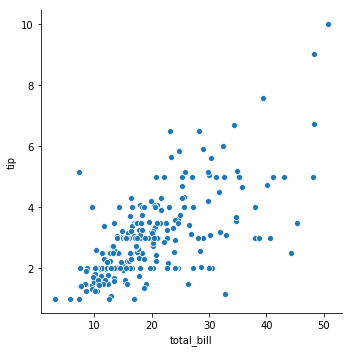

In [23]:
sns.relplot(data=tips,x='total_bill',y='tip')

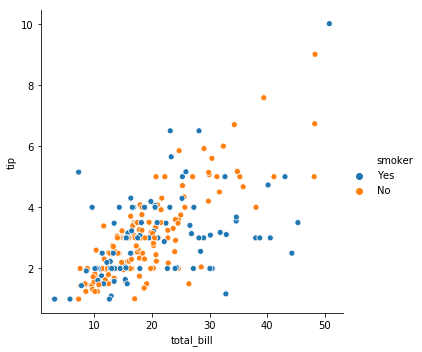

In [24]:
sns.relplot(data=tips,x='total_bill',y='tip',hue='smoker')

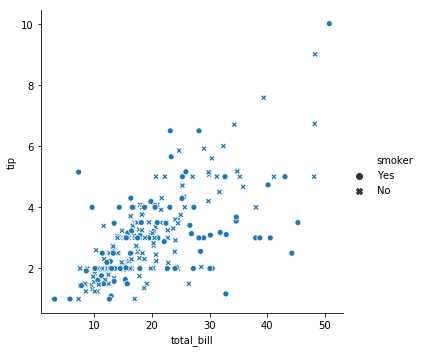

In [25]:
sns.relplot(data=tips,x='total_bill',y='tip',style='smoker')

In [26]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

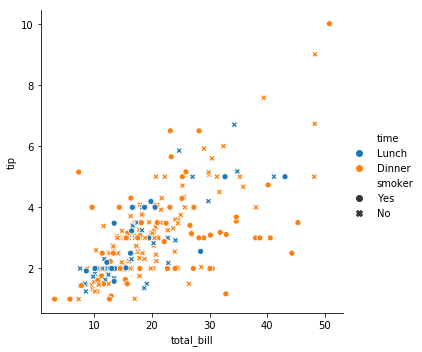

In [27]:
sns.relplot(data=tips,x='total_bill',y='tip',hue='time',style='smoker')

In [64]:
import requests
import seaborn as sns
non_farm_page = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PAYEMS&scale=left&cosd=1939-01-01&coed=2019-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-12-17&revision_date=2019-12-17&nd=1939-01-01')



In [66]:
import pandas as pd
import io
non_farm_data = pd.read_csv(io.StringIO(page.text))

In [67]:
non_farm_data.head()
non_farm_data['DATE'] = pd.to_datetime(non_farm_data['DATE'])

In [69]:
non_farm_data = non_farm_data.iloc[-120:]

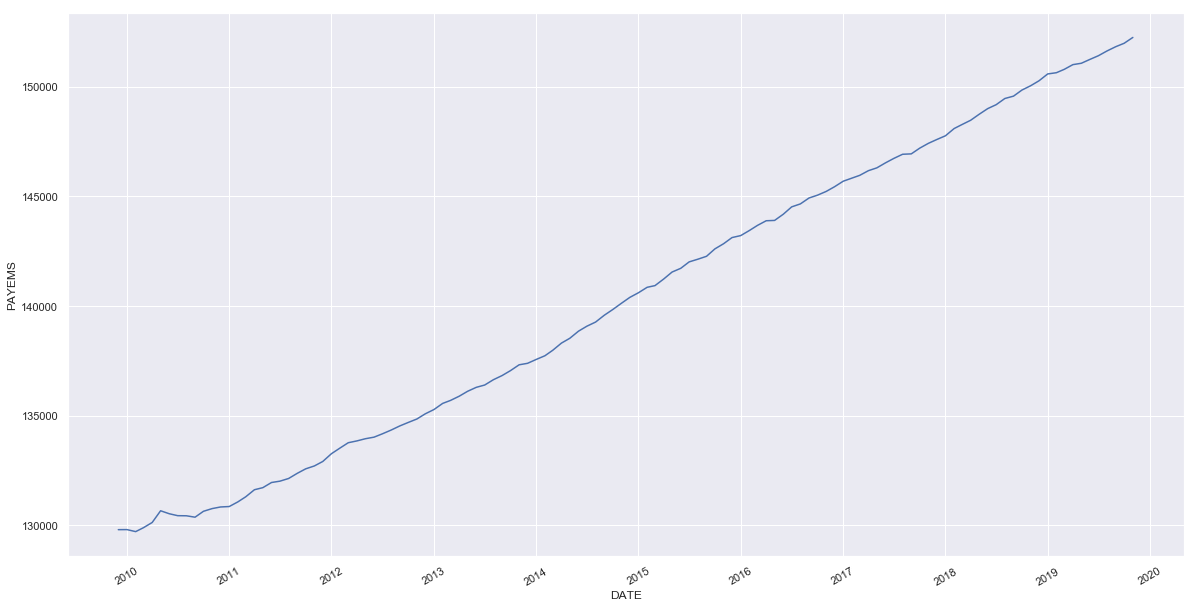

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.lineplot(data=non_farm_data,x='DATE',y='PAYEMS')
plt.xticks(rotation=30)
plt.show()

In [79]:
non_farm_data['Date_ax'] = non_farm_data['DATE'].dt.strftime('%Y-%m')

In [81]:
non_farm_data['Year_Increase'] = non_farm_data['PAYEMS'].diff(periods=12)

In [83]:
non_farm_data = non_farm_data.dropna()

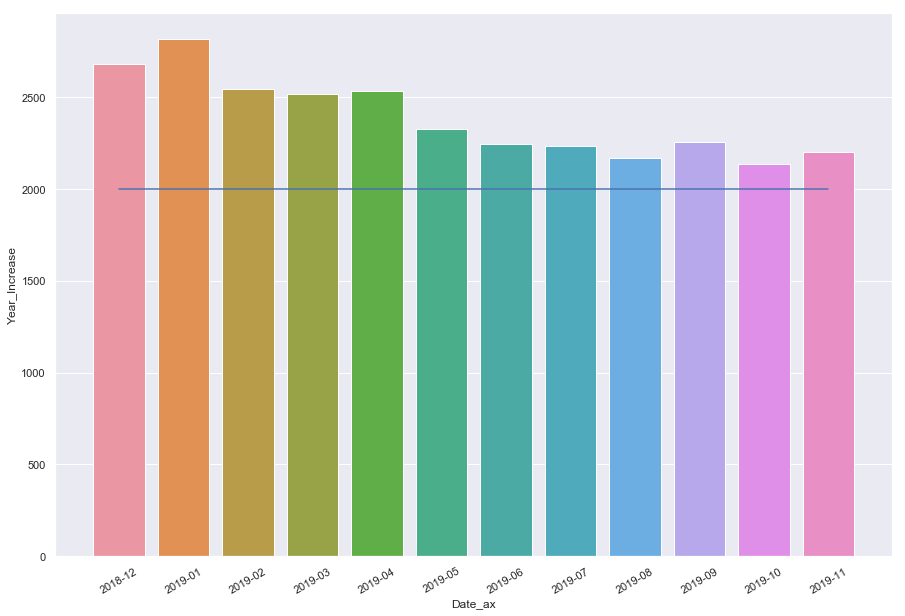

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(data=non_farm_data.iloc[-12:],x='Date_ax',y='Year_Increase')
plt.xticks(rotation=30)
plt.plot(non_farm_data['Date_ax'].iloc[-12:].values,12*[2000])
plt.show()